<a href="https://colab.research.google.com/github/kelvin19-dev/PCA-Projects/blob/main/NSE_Stock_Analysis_PCA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Data

In [2]:
df = pd.read_csv('/content/NSE_data_all_stocks_2020.csv',usecols = ['DATE','NAME', 'Day Price'], na_values = '-')

In [3]:
df.dtypes
df.shape

(17892, 3)

## Converting the Date column to the appropriate format

In [4]:
df['DATE'] = df['DATE'].apply(pd.to_datetime)

## Removing commas from the dataset in order to covert the values to floats

In [5]:
df.replace(',', '', regex=True, inplace=True)
df['Day Price'] = df['Day Price'].apply(pd.to_numeric)

## Sorting the values inorder to reshape

In [6]:
df = df.sort_values(by = ['DATE', 'NAME'])


## Reshaping the Dataset

In [7]:
st = df.pivot(index="DATE", columns="NAME", values="Day Price")
st.shape

(252, 71)

In [8]:
indx = ['NSE 25-Share Index','Zamara Kenya Equity Index (KES)', 
                       'Zamara Kenya Equity Index (USD)','NSE 20-Share Index',
                       'FTSE NSE Kenya 25 Index','FTSE NSE Kenya 15 Index',
                       'NSE All-Share Index','ABSA NewGold ETF']
stk = st.drop(columns=indx)

In [9]:
s = stk.sum()
stk = stk[s.sort_values(ascending=False).index[:25]]


In [10]:
prices = st['NSE 25-Share Index']


In [11]:
list(stk.columns)

['Kurwitu Ventures Ltd',
 'Limuru Tea Plc',
 'British American Tobacco Kenya Plc',
 'Kakuzi Plc',
 'Jubilee Holdings Ltd',
 'Standard Chartered Bank Kenya Ltd',
 'East African Breweries Ltd',
 'Williamson Tea Kenya Plc',
 'Stanbic Holdings Plc',
 'Diamond Trust Bank Kenya Ltd',
 'Kapchorua Tea Kenya Plc',
 'BOC Kenya Plc',
 'Crown Paints Kenya Plc',
 'I & M Holdings Plc',
 'Bamburi Cement Ltd',
 'KCB Group Plc',
 'Equity Group Holdings Plc',
 'Unga Group Ltd',
 'Safaricom Plc',
 'NCBA Group Plc',
 'Total Kenya Ltd',
 'Car and General (K) Ltd',
 'Centum Investment Company Plc',
 'Standard Group Plc',
 'Nation Media Group Plc']

## Creating stationary data point(Check financial signal processing)

In [12]:
rs = stk.apply(np.log).diff(1)

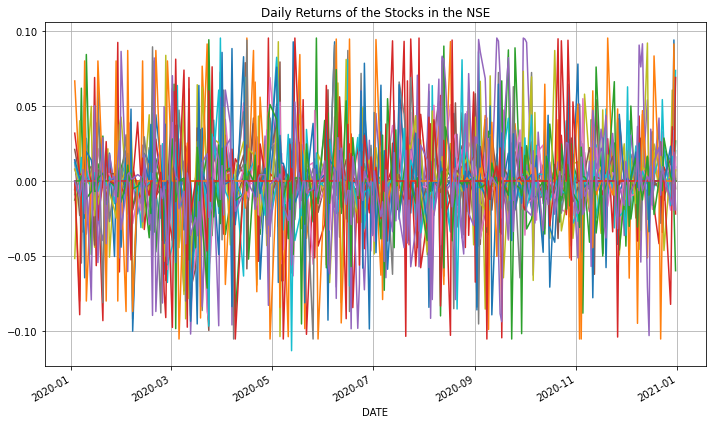

In [13]:
rs.plot(legend=0, figsize=(10,6), grid=True, title='Daily Returns of the Stocks in the NSE')
plt.tight_layout()
plt.savefig('tmp.png')

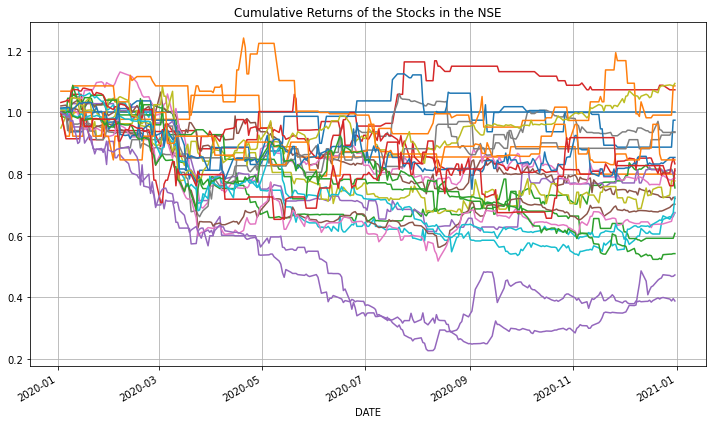

In [14]:
(rs.cumsum().apply(np.exp)).plot(legend=0, figsize=(10,6), grid=True, title='Cumulative Returns of the Stocks in the NSE')
plt.tight_layout()
plt.savefig('tmp.png')

In [15]:
from sklearn.decomposition import PCA
pca = PCA(1).fit(rs.fillna(0))

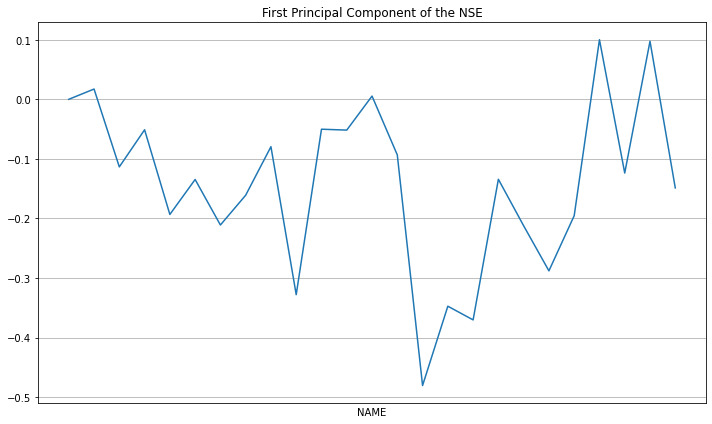

In [16]:
pc1 = pd.Series(index=rs.columns, data=pca.components_[0])

pc1.plot(figsize=(10,6), xticks=[], grid=True, title='First Principal Component of the NSE')
plt.tight_layout()
plt.savefig('tmp.png')

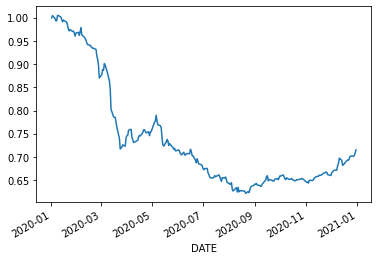

In [17]:
weights = abs(pc1)/sum(abs(pc1))
myrs = (weights*rs).sum(1)
myrs.cumsum().apply(np.exp).plot()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  """Entry point for launching an IPython kernel.


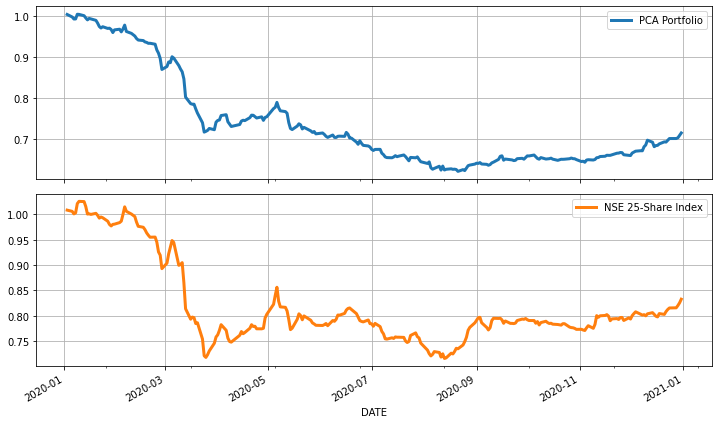

In [18]:
rs_df = pd.concat([myrs, prices.apply(np.log).diff(1)], 1)
rs_df.columns = ["PCA Portfolio", "NSE 25-Share Index"]

rs_df.dropna().cumsum().apply(np.exp).plot(subplots=True, figsize=(10,6), grid=True, linewidth=3);
plt.tight_layout()
plt.savefig('tmp.png')

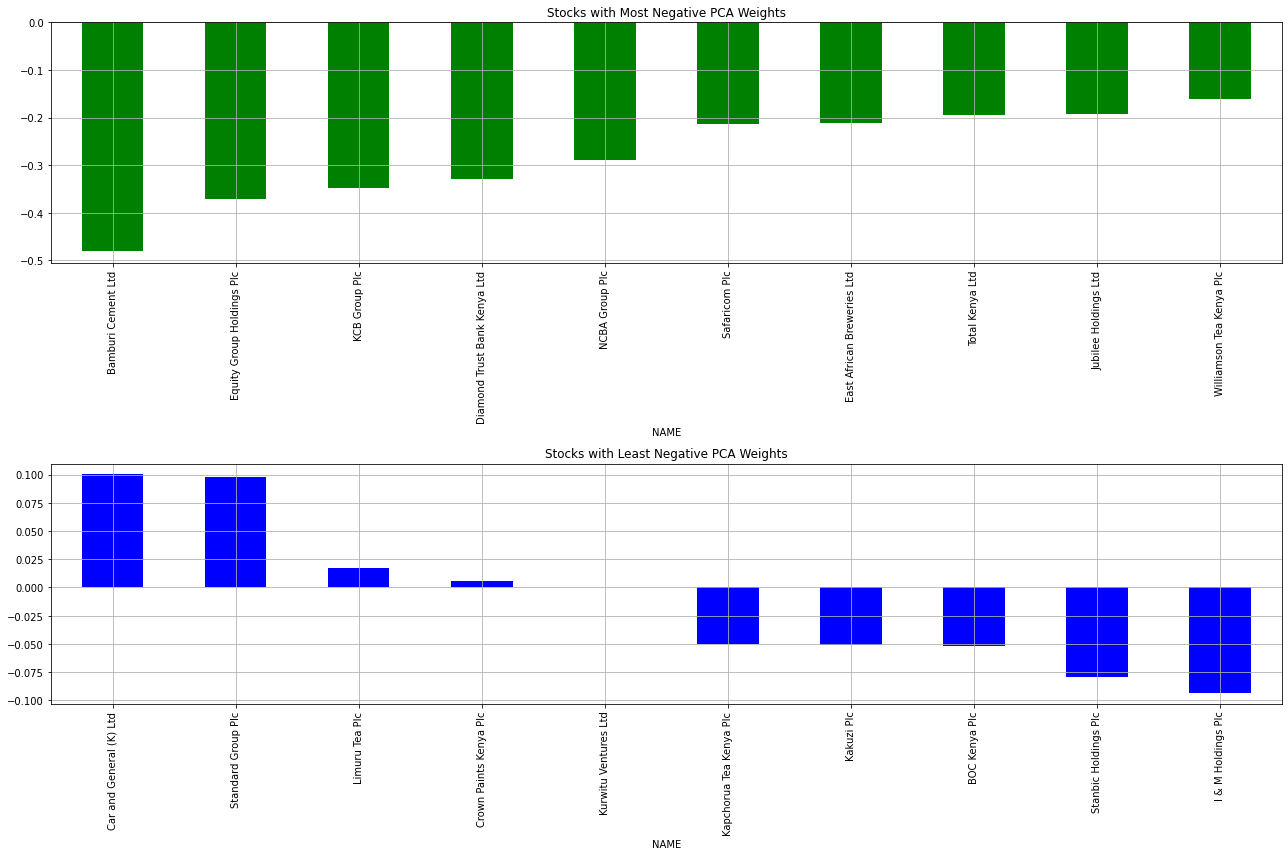

In [19]:
fig, ax = plt.subplots(2,1, figsize=(18,12))
pc1.nsmallest(10).plot.bar(ax=ax[0], color='green', grid=True, title='Stocks with Most Negative PCA Weights')
pc1.nlargest(10).plot.bar(ax=ax[1], color='blue', grid=True, title='Stocks with Least Negative PCA Weights')

plt.tight_layout()
plt.savefig('tmp.png')

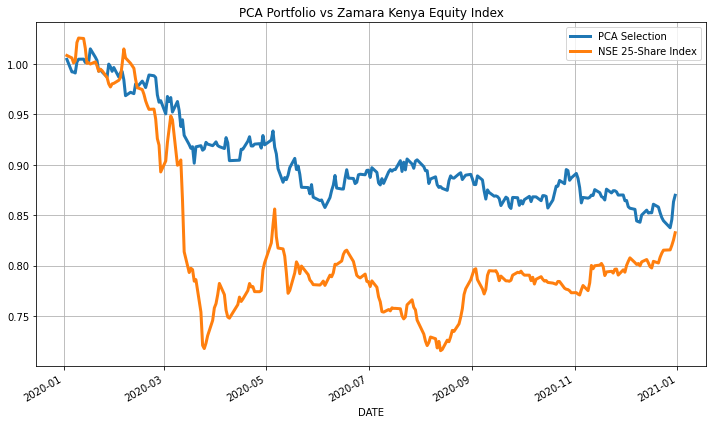

In [20]:
# ws = [-1,]*10+[1,]*10
# myrs = (rs[list(pc1.nsmallest(10).index)+list(pc1.nlargest(10).index)]*ws).mean(1)
myrs = rs[pc1.nlargest(10).index].mean(1)
myrs.cumsum().apply(np.exp).plot(figsize=(15,5), grid=True, linewidth=3, title='PCA Portfolio vs Zamara Kenya Equity Index')
prices['2020':].apply(np.log).diff(1).cumsum().apply(np.exp).plot(figsize=(10,6), grid=True, linewidth=3)
plt.legend(['PCA Selection', 'NSE 25-Share Index'])

plt.tight_layout()
plt.savefig('tmp.png')